In [98]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 3.6.1初始化模型参数

In [100]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

## 3.6.2定义softmax操作

In [102]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [103]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp/partition

In [104]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X, X_prob, X_prob.sum(1)

(tensor([[-0.2782,  2.2958, -1.3830,  2.0455, -0.8775],
         [ 0.3301, -0.1050, -0.4853, -0.6112,  0.2311]]),
 tensor([[0.0397, 0.5203, 0.0131, 0.4051, 0.0218],
         [0.2954, 0.1912, 0.1307, 0.1152, 0.2675]]),
 tensor([1., 1.]))

## 3.6.3定义模型

In [106]:
def net(X):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b) #reshape对X进行形状调整，通常是(batch_size,num_inputs)满足矩阵乘法要求

## 3.6.4定义损失函数

In [108]:
y = torch.tensor([0, 2]) #y的真实类别，第一个样本是0，第二个是2
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y] #高级索引操作

tensor([0.1000, 0.5000])

In [109]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

这段代码实现了 **交叉熵损失函数** 的计算，交叉熵常用于分类问题，衡量预测结果与真实标签之间的差异。让我们逐步解析这段代码：

### 1. **定义交叉熵损失函数 `cross_entropy`**：
```python
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])
```
- **`y_hat`** 是模型的预测输出，是一个概率分布张量，通常由 softmax 函数生成，形状为 `(batch_size, num_classes)`，其中 `batch_size` 是批次大小，`num_classes` 是类别数。
  
- **`y`** 是包含真实类别标签的张量，形状为 `(batch_size,)`，每个元素是一个类别索引。

- **`range(len(y_hat))`**：`range(len(y_hat))` 返回一个从 0 到 `len(y_hat)-1` 的整数列表，用于表示样本的索引。假设 `y_hat` 的形状是 `(batch_size, num_classes)`，`len(y_hat)` 就是批次大小 `batch_size`。
  
- **`y_hat[range(len(y_hat)), y]`**：这行代码使用 **高级索引** 从 `y_hat` 中提取每个样本对应真实类别 `y` 的预测概率：
  - `range(len(y_hat))` 生成样本索引。
  - `y` 是一个张量，包含每个样本的真实类别标签（即每个样本的类别索引）。所以 `y_hat[range(len(y_hat)), y]` 会从 `y_hat` 中提取每个样本的预测概率，选取的列是对应真实标签的列。

- **`torch.log()`**：对提取的概率值取自然对数。
  
- **负号 `-`**：交叉熵损失函数的公式是 `-log(p)`，其中 `p` 是预测概率，因此需要对其取负值。

### 2. **调用 `cross_entropy` 函数**：
```python
cross_entropy(y_hat, y)
```
- **`y_hat`** 是模型的预测概率张量，假设它是：
  ```
  y_hat = [[0.1, 0.3, 0.6],
           [0.3, 0.2, 0.5]]
  ```
  
- **`y`** 是真实标签张量，假设它是：
  ```
  y = [0, 2]
  ```
  这表示：
  - 第一个样本的真实标签是类别 0。
  - 第二个样本的真实标签是类别 2。

### 3. **计算结果**：
- 对于第一个样本（第 0 行），真实类别是 0，预测类别 0 的概率是 `0.1`，因此：
  ```
  - log(0.1) ≈ 2.3026
  ```
  
- 对于第二个样本（第 1 行），真实类别是 2，预测类别 2 的概率是 `0.5`，因此：
  ```
  - log(0.5) ≈ 0.6931
  ```

### 4. **返回结果**：
`cross_entropy(y_hat, y)` 将返回每个样本的交叉熵损失。计算结果是：
```python
tensor([2.3026, 0.6931])
```
这表示：
- 第一个样本的交叉熵损失为 2.3026。
- 第二个样本的交叉熵损失为 0.6931。

### 5. **总结**：
`cross_entropy` 函数通过计算每个样本的预测概率与真实标签之间的交叉熵损失来衡量模型的预测效果。返回的结果是一个张量，包含每个样本的损失值。

## 3.6.5.分类精度

In [112]:
def accuracy(y_hat, y):
    if len(y_hat.shape) >1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y)/len(y)

0.5

这段代码定义了一个 `accuracy` 函数，用于计算模型预测的准确率。准确率是衡量分类模型性能的一个常用指标，表示正确分类的样本数占总样本数的比例。我们来逐步解析这段代码：

### 1. **函数定义与目标**：
```python
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
```
- **`y_hat`**：模型的预测结果，通常是经过 `softmax` 处理后的概率分布。它的形状通常是 `(batch_size, num_classes)`，表示每个样本的各类预测概率。
- **`y`**：真实标签，通常是一个形状为 `(batch_size,)` 的张量，其中每个元素表示一个样本的类别索引。

### 2. **处理多类问题**：
```python
if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
```
- **`len(y_hat.shape) > 1 and y_hat.shape[1] > 1`**：这段代码判断 `y_hat` 是否为一个多类分类问题的输出（即 `y_hat` 是否是一个二维张量，且每一行包含多个类别的预测概率）。如果是多类分类问题，`y_hat` 的形状是 `(batch_size, num_classes)`。
- **`y_hat.argmax(axis=1)`**：如果是多类问题，我们使用 `argmax(axis=1)` 来选择每个样本的预测类别，即选择每行中概率最大的索引（即模型预测的类别）。这样 `y_hat` 的形状会从 `(batch_size, num_classes)` 变成 `(batch_size,)`，其中每个元素是一个类别索引，表示模型的预测结果。

### 3. **计算预测正确的样本数量**：
```python
cmp = y_hat.type(y.dtype) == y
```
- **`y_hat.type(y.dtype)`**：为了确保 `y_hat` 和 `y` 的数据类型一致，`y_hat.type(y.dtype)` 将 `y_hat` 转换为与 `y` 相同的数据类型。这样可以避免数据类型不匹配导致的错误。
- **`cmp = y_hat.type(y.dtype) == y`**：这一步计算每个样本的预测是否正确。如果预测正确，结果为 `True`，否则为 `False`。最终，`cmp` 是一个布尔张量，形状为 `(batch_size,)`，每个元素表示该样本的预测是否正确。

### 4. **计算准确率**：
```python
return float(cmp.type(y.dtype).sum())
```
- **`cmp.type(y.dtype)`**：将布尔张量 `cmp` 转换为与 `y` 相同的数据类型，通常会转换为 `int` 类型，`True` 为 1，`False` 为 0。
- **`cmp.type(y.dtype).sum()`**：对布尔张量求和，得到正确预测的样本数量。
- **`float(...)`**：将结果转换为浮点数，以便后续计算百分比等操作。

### 5. **总结**：
`accuracy` 函数计算了预测正确的样本数，并返回这个数量。具体流程如下：
1. 如果 `y_hat` 是多类分类问题的输出，使用 `argmax` 获取每个样本的预测类别。
2. 比较预测类别 `y_hat` 和真实类别 `y` 是否相同，得到一个布尔张量 `cmp`。
3. 计算正确预测的样本数，并返回结果。

### 示例：
假设 `y_hat` 和 `y` 如下：
```python
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.tensor([2, 2])
```
- 对于 `y_hat`，`argmax(axis=1)` 会得到 `[2, 2]`，表示模型预测两个样本的类别都是 2。
- `y` 也是 `[2, 2]`，所以所有预测都是正确的。
- `accuracy(y_hat, y)` 将返回 `2.0`，表示两个样本都被正确分类。



In [114]:
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module): #检测net是否为torch.nn.module的实例
        net.eval() #将模型设置为评估模式
    metric = Accumulator(2) #正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

这段代码定义了一个 `evaluate_accuracy` 函数，用于计算指定数据集上模型的精度。我们逐步解析它：

### 1. **函数定义**：
```python
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
```
- **`net`**：这是训练好的神经网络模型（一个 PyTorch `nn.Module` 实例）。
- **`data_iter`**：这是一个数据迭代器，用于遍历测试数据集（或者验证数据集）。它应该返回批量的数据（输入样本 `X` 和真实标签 `y`）。

### 2. **将模型设置为评估模式**：
```python
if isinstance(net, torch.nn.Module):
    net.eval()  # 将模型设置为评估模式
```
- **`isinstance(net, torch.nn.Module)`**：首先检查 `net` 是否是 `torch.nn.Module` 的实例。`torch.nn.Module` 是 PyTorch 中所有神经网络模型的基类。
- **`net.eval()`**：将模型设置为评估模式（`evaluation mode`）。这会影响一些层（如 dropout 和 batch normalization）的行为，使其在推理时不进行随机化（例如，`dropout` 在训练时会随机丢弃神经元，而在评估时会保持所有神经元）。

### 3. **初始化度量工具 `Accumulator`**：
```python
metric = Accumulator(2)  # 正确预测数、预测总数
```
- **`Accumulator(2)`**：`Accumulator` 是一个自定义工具类，通常用于累计多个值。在这里，它用于统计：
  - **第一个位置**：正确预测的样本数（准确的预测数）。
  - **第二个位置**：总预测的样本数（即数据集中的样本总数）。
  
  `Accumulator(2)` 初始化为包含两个元素的元组，分别用于统计正确预测的数量和总样本数。

### 4. **评估模型的准确率**：
```python
with torch.no_grad():
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
```
- **`torch.no_grad()`**：在 `torch.no_grad()` 上下文中执行代码，这样可以禁用梯度计算。在评估过程中，不需要计算梯度，因此使用 `no_grad()` 来节省内存和加速计算。
- **`for X, y in data_iter`**：遍历数据迭代器 `data_iter` 中的每个批次。`X` 是输入数据（例如，图像），`y` 是真实标签。
- **`net(X)`**：将输入 `X` 传递给模型 `net` 进行预测。`net(X)` 返回的是模型的输出（通常是一个概率分布）。
- **`accuracy(net(X), y)`**：计算模型的预测准确性，即计算预测的类别与真实标签 `y` 是否相等。
- **`y.numel()`**：`y.numel()` 返回标签张量 `y` 中的元素数量，也就是当前批次的样本数。
- **`metric.add(...)`**：将当前批次的准确预测数和样本数累加到 `metric` 中。

### 5. **返回最终准确率**：
```python
return metric[0] / metric[1]
```
- **`metric[0]`**：累积的正确预测的样本数。
- **`metric[1]`**：累积的样本总数。
- **`metric[0] / metric[1]`**：计算准确率，即正确预测的样本数与总样本数之比。

### 6. **总结**：
- `evaluate_accuracy` 函数计算模型在指定数据集上的准确率。具体步骤如下：
  1. 将模型设置为评估模式（`eval()`）。
  2. 遍历数据集，计算每个批次的准确率并累积正确预测的样本数和总样本数。
  3. 最后，返回准确率（正确预测的样本数与总样本数之比）。

### 示例：
假设我们有一个训练好的模型 `net` 和一个测试数据迭代器 `test_iter`，我们可以使用该函数评估模型在测试集上的准确率：
```python
accuracy = evaluate_accuracy(net, test_iter)
print(f"Test accuracy: {accuracy:.2f}")
``` 

这将输出测试集的准确率，帮助我们评估模型的性能。

In [116]:
[0.0]*10

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [117]:
class Accumulator:
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

这段代码定义了一个 **`Accumulator`** 类，用于在多个变量上进行累加。该类可以用于在训练过程中累计多个指标的值，比如正确预测的样本数、总样本数等。我们逐步解析代码：

### 1. **类定义与初始化**：
```python
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
```
- **`__init__(self, n)`**：初始化函数，`n` 是要累加的变量个数。`self.data = [0.0] * n` 创建一个长度为 `n` 的列表 `self.data`，初始值为 0.0，用于存储每个变量的累加值。
  - 例如，如果 `n=2`，则 `self.data` 初始化为 `[0.0, 0.0]`，可以用于存储两个变量的累加值。

### 2. **`add` 方法**：
```python
def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]
```
- **`add(self, *args)`**：这个方法用于将传入的参数（`args`）与 `self.data` 中当前存储的值相加，并更新 `self.data`。
  - `*args` 是一个可变长度的参数，它允许传入多个值（例如，两个或者更多的值）。
  - `zip(self.data, args)` 将 `self.data` 和 `args` 中的值配对，每次取出一对值（`a` 和 `b`）进行相加。`a` 是当前累加的值，`b` 是新传入的值。
  - `self.data = [...]` 使用列表推导式更新 `self.data` 中每个元素的累加值。
  
  例如，如果 `self.data = [0.0, 0.0]`，而调用 `add(1.5, 2.0)`，则更新后的 `self.data` 为 `[1.5, 2.0]`。

### 3. **`reset` 方法**：
```python
def reset(self):
    self.data = [0.0] * len(self.data)
```
- **`reset(self)`**：该方法用于重置累加器，将 `self.data` 中的所有值重新设置为 0.0。`len(self.data)` 确保重置后的列表长度与初始时相同。

### 4. **`__getitem__` 方法**：
```python
def __getitem__(self, idx):
    return self.data[idx]
```
- **`__getitem__(self, idx)`**：这个方法实现了通过索引访问 `self.data` 中的元素。`idx` 是索引值，可以用来获取累加器中指定位置的累加结果。
  - 例如，如果 `self.data = [1.5, 2.0]`，调用 `accumulator[0]` 将返回 `1.5`。

### 5. **总结**：
`Accumulator` 类用于在多个变量上进行累加操作，包含了以下方法：
- **`__init__(self, n)`**：初始化一个包含 `n` 个零的列表，用于存储累加结果。
- **`add(self, *args)`**：累加传入的多个值，并更新内部的累加器列表。
- **`reset(self)`**：重置累加器，将所有累加值清零。
- **`__getitem__(self, idx)`**：通过索引访问累加器中某个位置的值。

### 使用示例：
```python
# 创建一个包含两个变量的累加器
accumulator = Accumulator(2)

# 累加一些值
accumulator.add(1.0, 2.0)
accumulator.add(3.0, 4.0)

# 获取当前的累加值
print(accumulator[0])  # 输出: 4.0
print(accumulator[1])  # 输出: 6.0

# 重置累加器
accumulator.reset()

# 再次查看累加值
print(accumulator[0])  # 输出: 0.0
print(accumulator[1])  # 输出: 0.0
```

这个 `Accumulator` 类非常适合用于在训练过程中统计和累积多个指标，例如正确预测的数量、样本总数等。

In [119]:
evaluate_accuracy(net, test_iter)

0.1022

## 3.6.6.训练

In [172]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
        # 返回训练损失和训练精度
        return metric[0] / metric[2], metric[1] / metric[2]

In [183]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

这段代码定义了一个 **`Animator`** 类，用于增量地绘制图形，并在动画中更新数据。它特别适用于动态显示训练过程中的曲线（例如，训练损失、精度等的变化）。我们将逐步解析该类的实现。

### 1. **类定义与初始化**：
```python
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
```

#### 参数解释：
- **`xlabel`, `ylabel`**：分别设置 x 轴和 y 轴的标签。
- **`legend`**：图例的名称，如果没有提供，则为 `[]`（空列表）。
- **`xlim`, `ylim`**：x 轴和 y 轴的显示范围。
- **`xscale`, `yscale`**：x 轴和 y 轴的刻度，默认为 `'linear'`（线性刻度），也可以设置为 `'log'`（对数刻度）。
- **`fmts`**：数据线条的格式（如颜色、线型）。默认为 `('-', 'm--', 'g-.', 'r:')`，表示不同的线条样式。
- **`nrows`, `ncols`**：图表的行数和列数，默认是 1 行 1 列。
- **`figsize`**：图表的大小。

#### 初始化过程：
- **`self.fig, self.axes`**：创建一个 `matplotlib` 图表，`self.fig` 是整个图形对象，`self.axes` 是子图（可以是多个）。
- **`self.config_axes`**：使用 `d2l.set_axes` 函数来设置图表的标签、刻度范围等。
- **`self.X`, `self.Y`, `self.fmts`**：分别用来存储 x 和 y 数据点，以及每条曲线的格式。

### 2. **`add` 方法**：
```python
def add(self, x, y):
    # 向图表中添加多个数据点
    if not hasattr(y, "__len__"):
        y = [y]
    n = len(y)
    if not hasattr(x, "__len__"):
        x = [x] * n
    if not self.X:
        self.X = [[] for _ in range(n)]
    if not self.Y:
        self.Y = [[] for _ in range(n)]
    for i, (a, b) in enumerate(zip(x, y)):
        if a is not None and b is not None:
            self.X[i].append(a)
            self.Y[i].append(b)
    self.axes[0].cla()
    for x, y, fmt in zip(self.X, self.Y, self.fmts):
        self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)
```

#### 参数：
- **`x`, `y`**：要绘制的 x 和 y 数据，可以是单个值或多个值。

#### 逻辑：
1. **检查 `y` 是否是一个列表**：
   - 如果 `y` 不是一个列表（即它是单个数值），则将 `y` 转换为列表。
2. **确保 `x` 是一个列表**：
   - 如果 `x` 不是一个列表，将它扩展为与 `y` 列表长度相同的列表。
3. **初始化 `self.X` 和 `self.Y`**：
   - 如果 `self.X` 或 `self.Y` 为空，初始化它们为包含空列表的列表。每个列表对应一个数据系列。
4. **向 `self.X` 和 `self.Y` 添加数据**：
   - 遍历 `x` 和 `y` 中的每一对数据（`a`, `b`），将它们添加到对应的 `self.X[i]` 和 `self.Y[i]` 列表中。
5. **清除当前图表并重新绘制**：
   - **`self.axes[0].cla()`**：清空当前的图表，避免每次添加数据时累积旧的数据。
   - **`self.axes[0].plot(x, y, fmt)`**：绘制数据，`fmt` 是线条的格式（例如颜色、线型等）。
6. **配置轴**：
   - **`self.config_axes()`**：重新设置轴的标签、刻度等。
7. **显示和清除图形输出**：
   - **`display.display(self.fig)`**：显示当前图表。
   - **`display.clear_output(wait=True)`**：清除当前的输出，以便在下一个数据点绘制时不会累积显示。

### 3. **总结**：
- **`Animator`** 类用于增量地绘制图表，通常用于动态更新图表，例如实时显示训练过程中的损失、准确率等变化。
- **`add` 方法**：将新的数据点添加到图表中，并清除旧图表以进行更新。它支持多条曲线的绘制，可以通过不同的格式（`fmts`）为每条曲线指定不同的样式。

### 使用示例：
```python
# 创建 Animator 实例
animator = Animator(xlabel='Epoch', ylabel='Loss', legend=['train', 'test'])

# 假设训练过程中，记录每个 epoch 的训练损失和验证损失
for epoch in range(10):
    train_loss = 0.1 * (10 - epoch)  # 假设训练损失
    test_loss = 0.1 * (9 - epoch)   # 假设验证损失
    
    # 更新动画
    animator.add([epoch, epoch], [train_loss, test_loss])
```
这将创建一个显示训练损失和验证损失随 epoch 变化的动态图。

In [186]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='eopch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [192]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

AssertionError: 0.8135949969291687

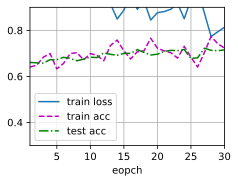

In [196]:
num_epochs = 30
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

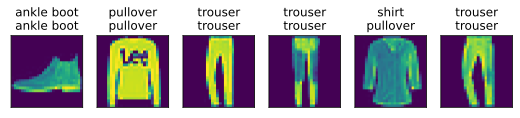

In [198]:
def predict_ch3(net, test_iter, n=6):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true+'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)